In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file = open('business.json', 'r')

In [5]:
data = file.read()

In [6]:
file.close()

In [7]:
json_string = json.dumps(data)

In [8]:
databusiness = json.loads(json_string)

In [9]:
# open input file: 
file = open('business.json') 

# read the first 10k entries
# set to -1 to process everything
stop = 192609

all_data = list()
for i, line in enumerate(file):
    if i%192609==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    names = data['name']
    reviews = data['review_count']
    # add to the data collected so far
    all_data.append([names, reviews])
# create the DataFrame
df = pd.DataFrame(all_data, columns=['name','review_count'])
print(df)
# df.to_hdf('revie20ws.h5','reviews')

file.close()

0
                                   name  review_count
0            Arizona Biltmore Golf Club             5
1            Emerald Chinese Restaurant           128
2           Musashi Japanese Restaurant           170
3       Farmers Insurance - Paul Lorenz             3
4                   Queen City Plumbing             4
...                                 ...           ...
192604               Sanderson Plumbing             9
192605                         Chapters             3
192606                   Phoenix Pavers            14
192607            Beasley's Barber Shop            15
192608                   Oriental Relax             3

[192609 rows x 2 columns]


In [10]:
counts = df[df['review_count']<50]['review_count'].to_numpy()

In [11]:
counts

array([ 5,  3,  4, ..., 14, 15,  3])

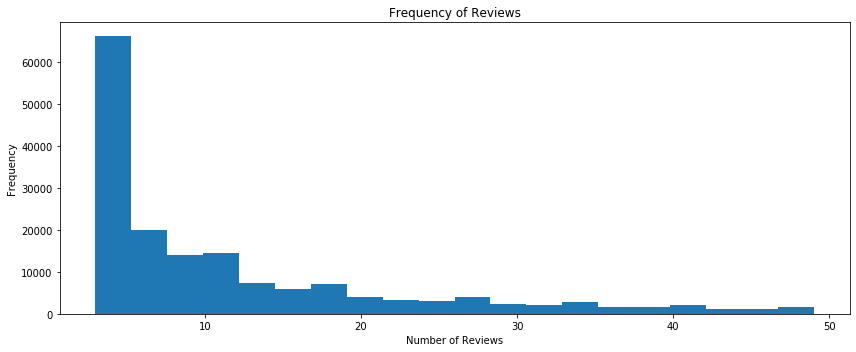

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (12,5), sharey = True, tight_layout = True)
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Reviews')
ax.hist(counts, bins=20);

In [13]:
name_words = set()
df['name'].str.lower().str.split().apply(name_words.update)
name_words

{'velda',
 'definitive',
 'gotham',
 'oishi',
 'krakoff',
 'madame',
 'amusements',
 'steamroller',
 'chime',
 'neuhauser',
 'yeux',
 'goût',
 'mucky',
 'guérin',
 'stoddard',
 "rubin's",
 'team-keller',
 'builders',
 'hinge',
 'domicile',
 'dupont',
 'sternberg',
 'dever',
 'dynasi',
 'ladan',
 'bm',
 'palookaville',
 'repair-ted',
 'dowswell,',
 'altogether',
 'pallavicini',
 'ria-flores',
 'rocky',
 'homco',
 'azcellphones',
 "umi's",
 'metroplex',
 'europe',
 'kenny',
 'vaporium',
 'jozsa',
 'gowireless',
 'sher-e-punjab',
 'choon',
 'mostow',
 'virun',
 "sylk's",
 "murrieta's",
 'dirty',
 'cornelis',
 'operation',
 'emt',
 'calipers',
 'jam:',
 'kangoo',
 'wool',
 'wild',
 "mcalister's",
 'miguel',
 'shelly',
 'croque',
 'whisky',
 'caremark',
 'llc.',
 'protech',
 'esnail',
 'pittsburgh-mcknight',
 "medina's",
 'it!',
 'gamblers',
 'kababeez',
 'crunch50',
 'diggitty',
 'cae',
 'gg',
 'whalen',
 'chiuchow',
 'reidhead',
 'janine',
 'hiking',
 'loeser',
 'coinamatic',
 'gaga',
 'm

In [14]:
from collections import Counter
from string import punctuation

from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/david/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
name_words = df['name'].str.lower()
word_counts = Counter(word_tokenize('\n'.join(name_words)))
word_counts.most_common()

[('&', 18349),
 ("'s", 16861),
 ('the', 9147),
 ('and', 5361),
 ('-', 4977),
 ('restaurant', 4659),
 ('of', 4073),
 ('pizza', 3852),
 ('bar', 3813),
 ('spa', 3426),
 ('center', 3424),
 ('grill', 3417),
 (',', 3036),
 ('auto', 2944),
 ('salon', 2926),
 ('cafe', 2715),
 ('nails', 2345),
 ('service', 2161),
 ('shop', 2160),
 ('care', 2087),
 ('house', 1978),
 ('vegas', 1860),
 ('hair', 1801),
 ('by', 1739),
 ('a', 1705),
 ('las', 1558),
 ('la', 1553),
 ('at', 1553),
 ('repair', 1549),
 ('dental', 1522),
 ('store', 1484),
 ('sushi', 1421),
 ('arizona', 1396),
 ('park', 1376),
 ('services', 1375),
 ('food', 1332),
 ('kitchen', 1330),
 ('studio', 1307),
 ('car', 1285),
 ('family', 1275),
 ('company', 1245),
 ('market', 1243),
 ('lounge', 1226),
 ('fitness', 1220),
 ('club', 1201),
 ('express', 1190),
 ('home', 1190),
 ('beauty', 1135),
 ('phoenix', 1131),
 ('valley', 1125),
 ('mexican', 1118),
 ('coffee', 1083),
 ('starbucks', 1073),
 ('city', 1051),
 ('inn', 1020),
 ("'", 1011),
 ('bakery',

In [16]:
type(word_counts)

collections.Counter

In [17]:
top_20 = word_counts.most_common(20)

In [18]:
type(top_20)

list

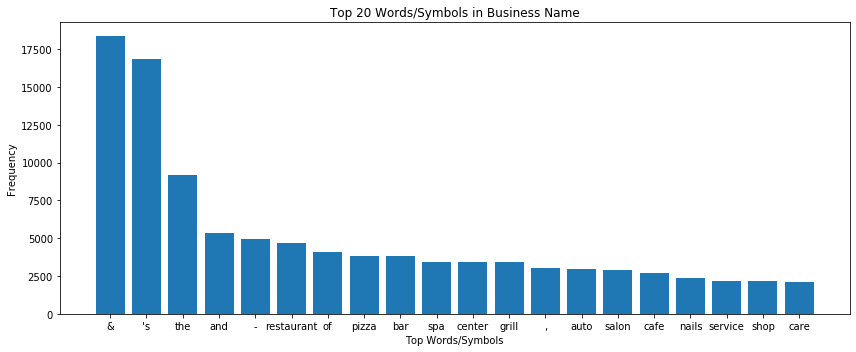

In [19]:
words, counts = zip(*top_20)

fig, ax = plt.subplots(1,1,figsize=(12,5),sharey=True, tight_layout=True)
ax.bar(words, counts, align='center')
ax.set_xlabel('Top Words/Symbols')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Words/Symbols in Business Name');

In [21]:
words, counts = zip(*top_20)

In [22]:
words

('&',
 "'s",
 'the',
 'and',
 '-',
 'restaurant',
 'of',
 'pizza',
 'bar',
 'spa',
 'center',
 'grill',
 ',',
 'auto',
 'salon',
 'cafe',
 'nails',
 'service',
 'shop',
 'care')

In [23]:
# open input file: 
ifile = open('business.json') 

# read the first 10k entries
# set to -1 to process everything
stop = 192609

all_data = list()
for i, line in enumerate(ifile):
    if i%192609==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    stars = data['stars']
    reviews = data['review_count']
    # add to the data collected so far
    all_data.append([stars, reviews])
# create the DataFrame
df = pd.DataFrame(all_data, columns=['stars','review_count'])
print(df)
# df.to_hdf('revie20ws.h5','reviews')

ifile.close()

0
        stars  review_count
0         3.0             5
1         2.5           128
2         4.0           170
3         5.0             3
4         4.0             4
...       ...           ...
192604    5.0             9
192605    4.5             3
192606    4.5            14
192607    4.5            15
192608    4.0             3

[192609 rows x 2 columns]


In [24]:
df['review_count'].median()

9.0

In [25]:
df['stars'].value_counts()

4.0    35969
3.5    35008
5.0    28216
4.5    27301
3.0    25996
2.5    18843
2.0    11426
1.5     4976
1.0     4874
Name: stars, dtype: int64

In [26]:
df['review_count'].value_counts()

3       33940
4       18534
5       13615
6       10951
7        8911
        ...  
2623        1
1981        1
1213        1
3260        1
829         1
Name: review_count, Length: 1184, dtype: int64

In [27]:
stars = df[df['review_count']<10]['stars'].to_numpy()
reviews = df[df['review_count']<10]['review_count'].to_numpy()
slope, intercept = np.polyfit(stars, reviews, 1)
x_pos = np.arange(1,5.5,0.5)
trendline = intercept + slope * x_pos 

print(type(stars))
print(type(reviews))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(0, 10.5)

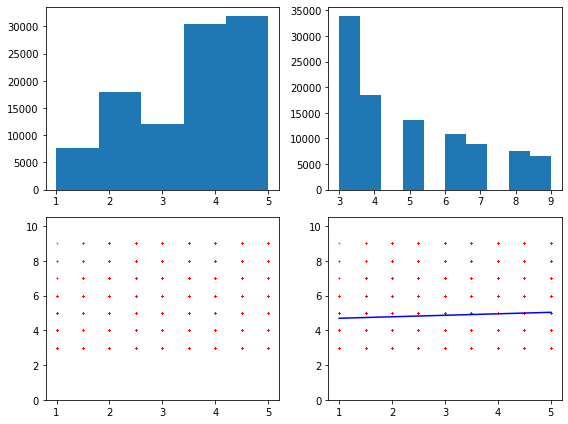

In [28]:
fig, ax = plt.subplots(2,2, figsize = (8,6), sharey=False, tight_layout=True)
ax[0][0].hist(stars, bins=5)
ax[0][1].hist(reviews, bins=10)

ax[1][0].scatter(stars,reviews, color = 'red', alpha = 0.003, s=3)
ax[1][0].set_ylim(0,10.5)

ax[1][1].scatter(stars,reviews, color = 'red', alpha = 0.003, s=3)
ax[1][1].plot(x_pos,trendline, color = 'blue', alpha = 1)
ax[1][1].set_ylim(0,10.5)
ax.set_title('Stars, ')




In [29]:
print(slope)
print(intercept)

0.08578458061505863
4.606736387071997


In [30]:
# stars = df[df['review_count']<10]['stars'].to_numpy()
# reviews = df[df['review_count']<10]['review_count'].to_numpy()

med_rev_ctn = []
for i in range(2,11):
    med_rev_ctn.append(df[df['stars'] == i/2]['review_count'].median())

x = np.linspace(1.0,5.0,num=9)
y = np.array(med_rev_ctn)

slope, intercept = np.polyfit(x, y, 1)
y_pred = intercept + slope * x

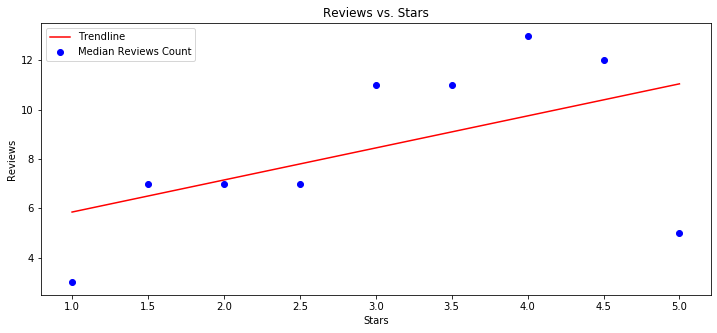

In [31]:
fig, ax = plt.subplots(1,1, figsize = (12,5))
ax.scatter(x, y, color = 'blue', label='Median Reviews Count')
ax.plot(x, y_pred, color = 'red', label='Trendline')
ax.set_xlabel('Stars')
ax.set_ylabel('Reviews')
ax.set_title('Reviews vs. Stars')
ax.legend()

In [32]:
# open input file: 
file = open('business.json') 

# read the first 10k entries
# set to -1 to process everything
stop = 192609

all_data = list()
for i, line in enumerate(file):
    if i%192609==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    names = data['name']
    stars = data['stars']
    reviews = data['review_count']
    city = data['city']
    state = data['state']
    attributes = data['attributes']
    categories = data['categories']
    
    # add to the data collected so far
    all_data.append([names, stars, reviews, city, state, attributes, categories])
# create the DataFrame
df = pd.DataFrame(all_data, columns=['names'
                                     , 'stars'
                                     , 'reviews_count'
                                     , 'city'
                                     , 'state'
                                     , 'attributes'
                                     , 'categories'])
print(df)
# df.to_hdf('revie20ws.h5','reviews')

file.close()

0
                                  names  stars  reviews_count  \
0            Arizona Biltmore Golf Club    3.0              5   
1            Emerald Chinese Restaurant    2.5            128   
2           Musashi Japanese Restaurant    4.0            170   
3       Farmers Insurance - Paul Lorenz    5.0              3   
4                   Queen City Plumbing    4.0              4   
...                                 ...    ...            ...   
192604               Sanderson Plumbing    5.0              9   
192605                         Chapters    4.5              3   
192606                   Phoenix Pavers    4.5             14   
192607            Beasley's Barber Shop    4.5             15   
192608                   Oriental Relax    4.0              3   

                   city state  \
0               Phoenix    AZ   
1           Mississauga    ON   
2             Charlotte    NC   
3              Goodyear    AZ   
4             Charlotte    NC   
...                

In [33]:
df.head(5)

,names,stars,reviews_count,city,state,attributes,categories
0,Arizona Biltmore Golf Club,3.0,5,Phoenix,AZ,{'GoodForKids': 'False'},"Golf, Active Life"
1,Emerald Chinese Restaurant,2.5,128,Mississauga,ON,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,Musashi Japanese Restaurant,4.0,170,Charlotte,NC,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese"
3,Farmers Insurance - Paul Lorenz,5.0,3,Goodyear,AZ,None,"Insurance, Financial Services"
4,Queen City Plumbing,4.0,4,Charlotte,NC,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi..."


In [34]:
states = df['state'].value_counts()
states

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
FL         4
XGM        4
AL         3
CT         3
WA         3
AK         2
GA         2
NE         2
VA         2
VT         2
XWY        2
UT         1
XGL        1
AR         1
CON        1
DUR        1
NJ         1
BC         1
BAS        1
TN         1
DOW        1
NM         1
Name: state, dtype: int64

In [35]:
top_15_states = states[0:14]
top_15_states.index

Index(['AZ', 'NV', 'ON', 'NC', 'OH', 'PA', 'QC', 'AB', 'WI', 'IL', 'SC', 'NY',
       'CA', 'TX'],
      dtype='object')

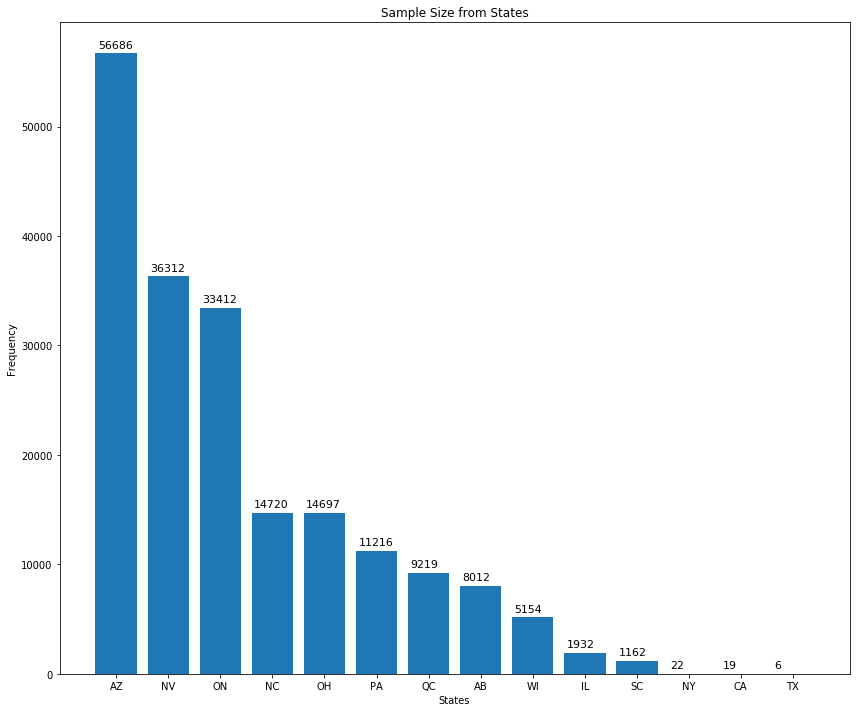

In [63]:
fig, ax = plt.subplots(1, 1, figsize = (12,10), tight_layout=True)
ax.bar(top_15_states.index, top_15_states)
ax.set_xlabel('States')
ax.set_ylabel('Frequency')
ax.set_title('Sample Size from States')
for i in ax.patches:
    ax.text(i.get_x() + .05, i.get_height()+500
           , str(round((i.get_height()), 2))
           , fontsize=11
           , color = 'black'
           , rotation = 0);

In [37]:
cat_words_lists = []
df['categories'].str.lower().str.split().apply(cat_words_lists.append)
cat_single_words_only = []

In [38]:
cat_words_lists

[['golf,', 'active', 'life'],
 ['specialty',
  'food,',
  'restaurants,',
  'dim',
  'sum,',
  'imported',
  'food,',
  'food,',
  'chinese,',
  'ethnic',
  'food,',
  'seafood'],
 ['sushi', 'bars,', 'restaurants,', 'japanese'],
 ['insurance,', 'financial', 'services'],
 ['plumbing,',
  'shopping,',
  'local',
  'services,',
  'home',
  'services,',
  'kitchen',
  '&',
  'bath,',
  'home',
  '&',
  'garden,',
  'water',
  'heater',
  'installation/repair'],
 ['shipping',
  'centers,',
  'couriers',
  '&',
  'delivery',
  'services,',
  'local',
  'services,',
  'printing',
  'services'],
 ['beauty', '&', 'spas,', 'hair', 'salons'],
 ['hair',
  'salons,',
  'hair',
  'stylists,',
  'barbers,',
  "men's",
  'hair',
  'salons,',
  'cosmetics',
  '&',
  'beauty',
  'supply,',
  'shopping,',
  'beauty',
  '&',
  'spas'],
 ['nail', 'salons,', 'beauty', '&', 'spas,', 'day', 'spas'],
 ['beauty', '&', 'spas,', 'nail', 'salons,', 'day', 'spas,', 'massage'],
 ['local',
  'services,',
  'professio

In [39]:
test_list1 = cat_words_lists

In [40]:
# Removes nested lists

test_list2 = []
def remove_nlists(lst):
    for i in lst:
        if type(i) == list:
            remove_nlists(i)
        else:
            test_list2.append(i)

remove_nlists(test_list1)
test_list2

['golf,',
 'active',
 'life',
 'specialty',
 'food,',
 'restaurants,',
 'dim',
 'sum,',
 'imported',
 'food,',
 'food,',
 'chinese,',
 'ethnic',
 'food,',
 'seafood',
 'sushi',
 'bars,',
 'restaurants,',
 'japanese',
 'insurance,',
 'financial',
 'services',
 'plumbing,',
 'shopping,',
 'local',
 'services,',
 'home',
 'services,',
 'kitchen',
 '&',
 'bath,',
 'home',
 '&',
 'garden,',
 'water',
 'heater',
 'installation/repair',
 'shipping',
 'centers,',
 'couriers',
 '&',
 'delivery',
 'services,',
 'local',
 'services,',
 'printing',
 'services',
 'beauty',
 '&',
 'spas,',
 'hair',
 'salons',
 'hair',
 'salons,',
 'hair',
 'stylists,',
 'barbers,',
 "men's",
 'hair',
 'salons,',
 'cosmetics',
 '&',
 'beauty',
 'supply,',
 'shopping,',
 'beauty',
 '&',
 'spas',
 'nail',
 'salons,',
 'beauty',
 '&',
 'spas,',
 'day',
 'spas',
 'beauty',
 '&',
 'spas,',
 'nail',
 'salons,',
 'day',
 'spas,',
 'massage',
 'local',
 'services,',
 'professional',
 'services,',
 'computers,',
 'shopping,',

In [41]:
len(test_list2)

1404072

In [42]:
cat_words_only = []
for i in test_list2:
    cat_words_only.append(str(i).strip(','))

In [43]:
cat_words_only

['golf',
 'active',
 'life',
 'specialty',
 'food',
 'restaurants',
 'dim',
 'sum',
 'imported',
 'food',
 'food',
 'chinese',
 'ethnic',
 'food',
 'seafood',
 'sushi',
 'bars',
 'restaurants',
 'japanese',
 'insurance',
 'financial',
 'services',
 'plumbing',
 'shopping',
 'local',
 'services',
 'home',
 'services',
 'kitchen',
 '&',
 'bath',
 'home',
 '&',
 'garden',
 'water',
 'heater',
 'installation/repair',
 'shipping',
 'centers',
 'couriers',
 '&',
 'delivery',
 'services',
 'local',
 'services',
 'printing',
 'services',
 'beauty',
 '&',
 'spas',
 'hair',
 'salons',
 'hair',
 'salons',
 'hair',
 'stylists',
 'barbers',
 "men's",
 'hair',
 'salons',
 'cosmetics',
 '&',
 'beauty',
 'supply',
 'shopping',
 'beauty',
 '&',
 'spas',
 'nail',
 'salons',
 'beauty',
 '&',
 'spas',
 'day',
 'spas',
 'beauty',
 '&',
 'spas',
 'nail',
 'salons',
 'day',
 'spas',
 'massage',
 'local',
 'services',
 'professional',
 'services',
 'computers',
 'shopping',
 'home',
 'services',
 'it',
 'serv

In [44]:
cat_only_word_counts = Counter(word_tokenize('\n'.join(cat_words_only)))
cat_only_word_counts.most_common()

[('&', 129038),
 ('services', 72809),
 ('restaurants', 59382),
 ('food', 47591),
 ('shopping', 32643),
 ('home', 31600),
 ('spas', 23387),
 ('bars', 21592),
 ('beauty', 21518),
 ('medical', 20510),
 ('health', 18736),
 ('hair', 15561),
 ('local', 15405),
 ('event', 14518),
 ('(', 13898),
 (')', 13898),
 ('repair', 13276),
 ('automotive', 13203),
 ('nightlife', 13095),
 ('stores', 12969),
 ('salons', 12847),
 ('planning', 12740),
 ('american', 12580),
 ('auto', 11392),
 ('life', 10049),
 ('arts', 9744),
 ('active', 9521),
 ('estate', 9096),
 ('real', 8872),
 ('hotels', 8658),
 ('tea', 8306),
 ('pet', 8112),
 ('fashion', 7969),
 ('coffee', 7548),
 ('sandwiches', 7332),
 ('traditional', 7321),
 ('fast', 7257),
 ('new', 6846),
 ('pizza', 6804),
 ('entertainment', 6685),
 ('travel', 6553),
 ('garden', 6491),
 ('specialty', 6471),
 ('shops', 6446),
 ('professional', 6353),
 ('dentists', 6245),
 ('doctors', 5867),
 ('care', 5730),
 ('breakfast', 5584),
 ('clothing', 5552),
 ('burgers', 5404),

In [45]:
cat_words_top20 = cat_only_word_counts.most_common(20)

Text(0.5, 1.0, 'Top Stand Alone Words/Symbols by Catagories')

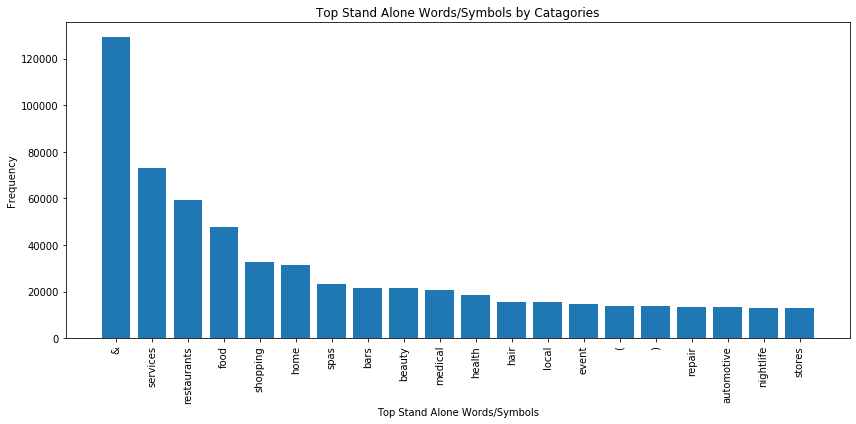

In [46]:
words, counts = zip(*cat_words_top20)

fig, ax = plt.subplots(1,1,figsize=(12,6),sharey=True, tight_layout=True)
ax.bar(words, counts, align='center')
ax.set_xlabel('Top Stand Alone Words/Symbols')
ax.set_xticklabels(words, rotation=90)
ax.set_ylabel('Frequency')
ax.set_title('Top Stand Alone Words/Symbols by Catagories')

In [47]:
cat_only_word_counts['cleaning']

4854

In [48]:
cat_only_word_counts['french']

1027

In [49]:
len(cat_only_word_counts)

1379

In [50]:
sum(cat_only_word_counts.values())

1431868

In [51]:
cuisines = np.array(['halal', 'southern', 'caribbean', 'tex-mex', 'indian', 'mediterranean', 'mexican', 'chinese', 'korean', 'thai', 'italian', 'french', 'american', 'japanese', 'vietnamese'])
cuisines_freq = np.array([cat_only_word_counts[x] for x in cuisines])

Text(0.5, 1.0, 'Frequency of Cuisines')

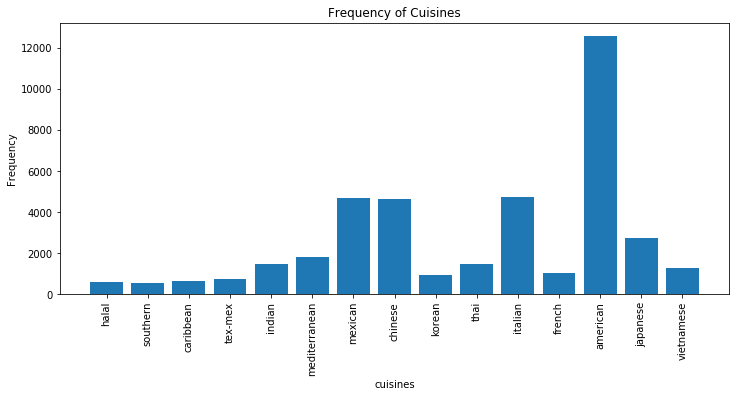

In [52]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.bar(cuisines, cuisines_freq)
ax.set_xticklabels(cuisines, rotation=90)
ax.set_xlabel('cuisines')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Cuisines')

In [53]:
-np.sort(-cuisines_freq)

array([12580,  4716,  4673,  4653,  2723,  1834,  1489,  1472,  1286,
        1027,   923,   737,   634,   620,   536])

In [54]:
np.argsort(-cuisines_freq)

array([12, 10,  6,  7, 13,  5,  4,  9, 14, 11,  8,  3,  2,  0,  1])

In [117]:
cuisines[np.argsort(-cuisines_freq)]

array(['american', 'italian', 'mexican', 'chinese', 'japanese',
       'mediterranean', 'indian', 'thai', 'vietnamese', 'french',
       'korean', 'tex-mex', 'caribbean', 'halal', 'southern'],
      dtype='<U13')

Text(0.5, 1.0, 'Frequency of Cuisines')

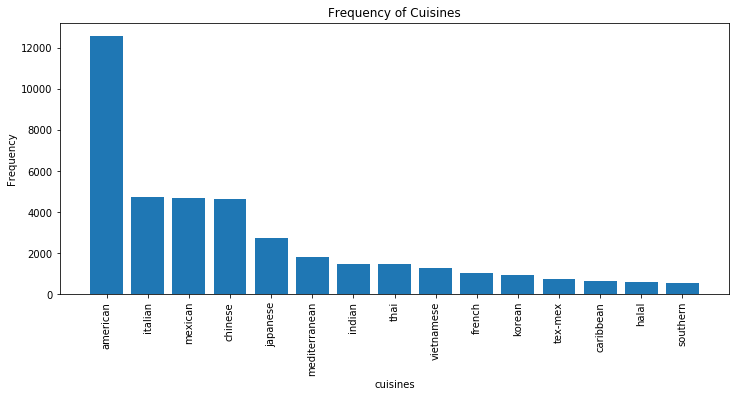

In [119]:
# Sorted Cuisines
x = cuisines[np.argsort(-cuisines_freq)]
y = -np.sort(-cuisines_freq)
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.bar(x, y)
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel('cuisines')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Cuisines')